# **1. Giới thiệu**

Thật khó để biết một thứ thực sự đáng giá bao nhiêu. Chi tiết nhỏ có thể có nghĩa là sự khác biệt lớn về giá cả. Ví dụ, một trong những chiếc áo len này có giá 335 đô la và chiếc còn lại có giá 9,99 đô la. Bạn có đoán được cái nào không?
Việc định giá sản phẩm thậm chí còn khó hơn trên quy mô lớn, chỉ cần xem xét có bao nhiêu sản phẩm được bán trực tuyến. Quần áo có xu hướng định giá theo mùa mạnh mẽ và bị ảnh hưởng nhiều bởi thương hiệu, trong khi đồ điện tử có giá dao động dựa trên thông số kỹ thuật của sản phẩm.

Mercari , ứng dụng mua sắm do cộng đồng lớn nhất Nhật Bản cung cấp, hiểu sâu sắc vấn đề này. Họ muốn đưa ra các đề xuất về giá cả cho người bán, nhưng điều này rất khó vì người bán của họ được phép đưa bất kỳ thứ gì hoặc bất kỳ gói nào lên thị trường của Mercari.


# **2. Mục tiêu**

Mục tiêu ở đây là đưa ra một mô hình dự đoán giá của một sản phẩm một cách phù hợp dựa trên các dữ liệu được cung cấp bởi Mercari. Vì vậy đây là vấn đề hồi quy (regression Problem)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **3. Chuẩn bị dữ liệu**

In [ ]:
#cài đặt phần mềm giải nén
!apt-get install p7zip
#Giải nén các gói dữ liệu
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/test.tsv.7z
!p7zip -d -f -k /kaggle/input/mercari-price-suggestion-challenge/sample_submission.csv.7z

In [ ]:
#Giải nén dữ liệu
!unzip /kaggle/input/mercari-price-suggestion-challenge/sample_submission_stg2.csv.zip
!unzip /kaggle/input/mercari-price-suggestion-challenge/test_stg2.tsv.zip

# **4. Chuẩn bị thư viện**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

# **5. Đọc dữ liệu**

In [ ]:
#Đọc dữ liệu từ 2 tập 'train.tsv' và tập 'test_stg2.tsv'(đưa về dạng bảng) sử dụng hàm có sẵn read_table
train = pd.read_table('train.tsv')
test = pd.read_table('test_stg2.tsv')

In [ ]:
#lấy ra 5 giá trị đầu của tập train và quan sát
train.head()

**Tập dữ liệu train**
* Ở tập train, mỗi 1 sản phẩm sẽ có 8 thuộc tính bao gồm: train_id, name, item_condition_id, categtory_name, brand_name, price, shipping, item_description
* Ở tệp brand có nhiều giá trị NaN rỗng

In [ ]:
#Kiểm tra thông tin của tập 'train' thông qua hàm info()
train.info()

=> dữ liệu trong tập train bao bồm 1482535 mục gồm 8 cột
* Thông tin về kiểu dữ liệu của mỗi cột

**Tập dữ liệu test**

In [ ]:
#Hiện thị dữ liệu 5 ví dụ dữ liệu của tập test
#Sử dụng để kiểm thử mô hình
test.head(10)

**Nhận xét dữ liệu ở tệp test**
* Chỉ chứa 7 cột dữ liệu và thiếu cột price cần dự đoán
* Thông tin các cột còn lại tương tự với tệp train

In [ ]:
#Kiểm tra thông tin dữ liệu ở tập 'test'
test.info()

# **6. Xử lí và phân tích dữ liệu**

Dữ liệu cung cấp cho chúng ta biết các mô tả bằng văn bản về các sản phẩm, bao gồm cột thông tin gồm 8 cột là:
* train_id, test_id (int64): id danh sách
* name (object): tiêu đề của danh sách
* item_condition_id (int64): tình trạng mặt hàng do người bán cung cấp
* category_name (object): phân loại của sản phẩm
* brand_name (object): tên của nhãn hàng
* shipping (int64): giá trị là 1 nếu người mua phải trả ship và giá trị là 0 nếu người mua không phải trả ship
* item_description (object): Mô tả đầy đủ của sản phẩm

**Mục tiêu:** Đây là bài toán hồi quy tuyến tính nên chúng ta cần xử lí dữ liệu và đưa các thuộc tính về dạng vector hoặc số thực
* Xử lý dữ liệu rỗng
* Mã hóa 'brand_name', '

# **6.1. Xử lí các giá trị Null**

In [ ]:
print("train: ")
#đếm các giá trị null trong tập train
print(pd.isnull(train).sum())
print("="*30)
#đếm các giá trị null trong tập test
print("test: ")
print(pd.isnull(test).sum())

**Nhận xét**
* giá trị null có trong các thuộc tính: category_name, brand_name, item_description

In [ ]:
print("{0:.2f}% sản phẩm không có thương hiệu(brand_name) ở tập train".format((pd.isnull(train['brand_name']).sum())*100/train.shape[0]))

print("{0:.2f}% sản phẩm không có phân loại(category_name) ở tập train".format((pd.isnull(train['category_name']).sum())*100/train.shape[0]))

In [ ]:
print("{0:.2f}% sản phẩm không có thương hiệu(brand_name) ở tập test".format((pd.isnull(test['brand_name']).sum())*100/test.shape[0]))

print("{0:.2f}% sản phẩm không có thương hiệu(brand_name) ở tập test".format((pd.isnull(test['category_name']).sum())*100/test.shape[0]))

**Nhận xét**
* Thuộc tính brand_name ở cả hai tập dữ liệu là train và test đều có trên 40% là rỗng
* Chỉ có 3 thuộc tính là có chứa giá trị rỗng

In [ ]:
import gc
gc.collect()

In [ ]:
#Xử lý các giá trị null trong thuộc tính brand_name bằng cách thay thế nó bằng 'Nobrand'
train['brand_name'] = train['brand_name'].fillna('Nobrand')
test['brand_name'] = test['brand_name'].fillna('Nobrand')
#Xử lý các giá trị null trong thuộc tính category_name bằng cách thay thế nó bằng 'No/No/No'
train['category_name'] = train['category_name'].fillna('No/No/No')
test['category_name'] =test['category_name'].fillna('No/No/No')
#Lấp các giá trị null bằng 'No description'
train['item_description'] = train['item_description'].fillna('No Description')
test['item_description'] = test['item_description'].fillna('No Description')

In [ ]:
#lấy ra danh sách 10 cái đầu của train để quan sát sau khi xử lý dữ liệu
train.head(10)

In [ ]:
#Kiểm tra lại các giá trị rỗng xem chúng đã được xử lý chưa
print(pd.isnull(train).sum())
print("="*30)
print(pd.isnull(test).sum())

=> Đã không còn giá trị rỗng nào

# **6.2. Xử lý thông tin trong cột category_name**
* Như chúng ta đã thấy thông tin trong cột category_name chứa khá nhiều phân loại của sản phẩm vì thế chúng ta cần chia nhỏ nó để xử lý
* Mỗi phân loại sẽ được phân tách nhau bằng một dấu '/'

=> Chúng ta phải sự dụng một hàm để cắt dữ liệu tại vị trí dấu '/'

In [ ]:
#Hàm split_cat dùng để cắt các nhãn trong cột 'category_name' thành các cột riêng biệt
def split_cat(category_name):
    try:
        return category_name.split('/')
        return ("done")
    except:
        return ['Null', 'Null', 'Null']
train['subcat_1'], train['subcat_2'], train['subcat_3'] = zip(*train['category_name'].apply(lambda x:split_cat(x)))

test['subcat_1'], test['subcat_2'], test['subcat_3'] = zip(*test['category_name'].apply(lambda x: split_cat(x)))
# Bởi vì có những list of list nên phải sử dụng zip (*) để có được danh sách 3 cuối cùng

Sau khi chia xong chúng ta sẽ kiểm tra lại

In [ ]:
train.head(10)

In [ ]:
test.head(10)

In [ ]:
#Định dạng 
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#Thống kê số lượng, giá trị trung bình, min, max, giá trị phổ biến của các cột chứa dữ liệu dạng số
train.describe()

# **6.3. Quan sát cột price**

In [ ]:
#Biểu đồ phân bố giá của các sản phẩm trong tập train)
plt.figure(figsize=(10,5))
plt.hist(train['price'], bins = 100, edgecolor='white', range=[0,300])
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.show()

Nhận xét
* Đồ thị bị lệch nhiều sang bên trái
* Vì vậy chúng ta cần đưa về dạng phân phối với của giá trị log(price)

In [ ]:
#Biểu đồ phân phối log(price)
plt.figure(figsize=(10,5))
plt.hist(np.log(train['price']+1),bins=50, edgecolor='white') 
plt.ylabel('Frequency')
plt.xlabel('log_Price')
plt.show()

Nhận xét:
* Đồ thị đã có dạng đều hơn và cân bằng và cao nhất tại điểm trung bình

# **6.4. Quan sát và đánh giá dữ liệu ở cột item_condition_id**

In [ ]:
#Biểu đồ phân tích cột item_condition_id
ax = sns.countplot(x = 'item_condition_id',data=train, palette ='Blues_r')
ax.set_title("Tổng số lượng sản phẩm theo item_condition_id", fontsize = 13)

ở đây chúng ta đã thấy tổng số sản phẩm theo từng item_codition_id 
và có 3 mẫu 1,2,3 là phổ biến nhất

In [ ]:
(train['shipping'].value_counts())*100/train.shape[0]

In [ ]:
plt.figure(figsize=(10,8))

plt.hist(np.log(train['price'][train['shipping']==0]+1),bins=50, edgecolor='white',color="blue", label='shipping = 0') 
plt.hist(np.log(train['price'][train['shipping']==1]+1),bins=50, edgecolor='white',color="cornflowerblue",label="shipping = 1") 
plt.xlabel('log_Price')
plt.legend(loc='upper right')
plt.title('Shipping')
plt.show()

In [ ]:
#danh sách 10 thuong hiệu phổ biến nhất
brands =train['brand_name'].value_counts()
print(brands[:10])

In [ ]:
#Quan sát phân phối giá của các thương hiệu phổ biến nhất
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)#hình có 3 hàng 3 cột và đây là biểu đò đầu tiên trong hình
plt.hist(np.log(train['price'][train['brand_name']=='Nobrand']+1),bins=50, edgecolor='white')
plt.xlabel('log_Price')
plt.ylabel('Frequency')
plt.title('Nobrand')

plt.subplot(3, 3, 2)
plt.hist(np.log(train['price'][train['brand_name']=='Nike']+1),bins=50, edgecolor='white')
plt.xlabel('log_Price')
plt.ylabel('Frequency')
plt.title('Nike')

plt.subplot(3, 3, 3)
plt.hist(np.log(train['price'][train['brand_name']=="Victoria's Secret"]+1),bins=50, edgecolor='white')
plt.xlabel('log_Price')
plt.ylabel('Frequency')
plt.title("Victoria's Secret")

plt.subplot(3, 3, 4)
plt.hist(np.log(train['price'][train['brand_name']=='LuLaRoe']+1),bins=50, edgecolor='white')
plt.xlabel('log_Price')
plt.ylabel('Frequency')
plt.title('LuLaRoe')

plt.subplot(3, 3, 5)
plt.hist(np.log(train['price'][train['brand_name']=='Apple']+1),bins=50, edgecolor='white')
plt.xlabel('log_Price')
plt.ylabel('Frequency')
plt.title('Apple')

plt.subplot(3, 3, 6)
plt.hist(np.log(train['price'][train['brand_name']=='FOREVER 21']+1),bins=50, edgecolor='white')
plt.xlabel('log_Price')
plt.ylabel('Frequency')
plt.title('FOREVER 21')

plt.subplot(3, 3, 7)
plt.hist(np.log(train['price'][train['brand_name']=='Nintendo']+1),bins=50, edgecolor='white')
plt.xlabel('log_Price')
plt.ylabel('Frequency')
plt.title('Nintendo')

plt.subplot(3, 3, 8)
plt.hist(np.log(train['price'][train['brand_name']=='Lululemon']+1),bins=50, edgecolor='white')
plt.xlabel('log_Price')
plt.ylabel('Frequency')
plt.title('Lululemon')

plt.subplot(3, 3, 9)
plt.hist(np.log(train['price'][train['brand_name']=='Michael Kors']+1),bins=50, edgecolor='white')
plt.xlabel('log_Price')
plt.ylabel('Frequency')
plt.title('Michael Kors')

plt.show()

In [ ]:
#10 thương hiệu ít phổ biến nhất
print(brands[-10:-1])

# **6.5. Quân sát dữ liệu ở các cột subcat**

In [ ]:
print("Có %d nhãn ở cột subcat_1." % train['subcat_1'].nunique())

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x = 'subcat_1', data = train, palette ='Blues_r', edgecolor='k')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Biểu đồ số lượng các sản phẩm chứa các nhãn ở cột subcat_1')


In [ ]:
train.groupby('subcat_1')['price'].describe()

In [ ]:
print("Có %d nhãn ở cột subcat_2." % train['subcat_2'].nunique())

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='subcat_2',data=train,order=train.subcat_2.value_counts().iloc[:20].index, palette ='Reds_r', edgecolor='k')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Biểu đồ số lượng sản phẩm chứa các nhãn ở subcat_2 ')

In [ ]:
train.groupby('subcat_2')['price'].describe()[:10]

In [ ]:
print("Có %d nhãn ở cột subcat_3." % train['subcat_3'].nunique())

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='subcat_3',data=train,order=train.subcat_3.value_counts().iloc[:20].index, palette ='Greens_r', edgecolor='k')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Biểu đồ số lượng sản phẩm chứa các nhãn ở subcat_3 ')

In [ ]:
train.groupby('subcat_3')['price'].describe()[:10]

In [ ]:
# Đếm số lượng 1 số từ trong 'name'
train['name'].value_counts()[:10]

In [ ]:
x = train['name'].apply(lambda x: len(x))
plt.hist(x,bins = 30,range=[0,50],edgecolor='white')
plt.show()

In [ ]:
from wordcloud import WordCloud
import os
wordcloud = WordCloud(width = 2400, height = 1200).generate(" ".join(train.item_description.astype(str)))
plt.figure(figsize = (13, 10))
plt.imshow(wordcloud)
plt.show()

# **Vector hóa dữ liệu dạng label**

**Chúng ta sử dụng LabelBinarizer để chuyển đổi các label sang dạng nhị phân**
* Dữ liệu trả về sẽ có dạng ma trận 

In [ ]:
#item_condition_id
lb_item_condition_id = LabelBinarizer(sparse_output=True)
train_condition = lb_item_condition_id.fit_transform(train['item_condition_id'])
test_condition = lb_item_condition_id.transform(test['item_condition_id'])

train_condition.shape

=> ma trận trả về có 1482535 hàng (vì trong tập train có dữ liệu của 1482535 sản phẩm) và có 5 cột vì chỉ có 5 kiểu item_condition

In [ ]:
#shipping
lb_shipping = LabelBinarizer(sparse_output=True)
train_shipping = lb_shipping.fit_transform(train['shipping'])
test_shipping = lb_shipping.transform(test['shipping'])
train_shipping.shape

=> ma trận trả về có 1482535 hàng (vì trong tập train có dữ liệu của 1482535 sản phẩm) và có 1 cột vì chỉ có 2 kiểu shipping

In [ ]:
lb_brand_name = LabelBinarizer(sparse_output=True)
train_brand_name= lb_brand_name.fit_transform(train['brand_name'])
test_brand_name = lb_brand_name.transform(test['brand_name'])
train_brand_name.shape

=> ma trận trả về có 1482535 hàng (vì trong tập train có dữ liệu của 1482535 sản phẩm) và có 4810 cột vì có 4810 thương hiệu

In [ ]:
count_vec = CountVectorizer()
#Sử dụng CountVectorizer() để chuyển cột name từ dạng text về dạng một vecto trên cơ sở số lần xuất hiện của mỗi từ
#CountVectorizer tạo một ma trận trong đó mỗi từ duy nhất được biểu thị bằng một cột của ma trận và với tên của mỗi sản phẩm là một hàng trong ma trận. Giao của một hàng và một cột chính là số lần xuất hiện của từ(tương úng với cột) trong tên của sản phẩm (tương úng với hàng)

train_name = count_vec.fit_transform(train['name'])
test_name = count_vec.transform(test['name'])

In [ ]:
print(train_name.shape)

TF-IDF (Term Frequency – Inverse Document Frequency) là 1 kĩ thuật sử dụng trong khai phá dữ liệu văn bản. Trọng số này được sử dụng để đánh giá tầm quan trọng của một từ trong một văn bản.

TF: Term Frequency(Tần suất xuất hiện của từ) là số lần từ xuất hiện trong văn bản. Vì các văn bản có thể có độ dài ngắn khác nhau nên một số từ có thể xuất hiện nhiều lần trong một văn bản dài hơn là một văn bản ngắn. Như vậy, term frequency thường được chia cho độ dài văn bản( tổng số từ trong một văn bản).

IDF: Inverse Document Frequency(Nghịch đảo tần suất của văn bản), giúp đánh giá tầm quan trọng của một từ . Khi tính toán TF , tất cả các từ được coi như có độ quan trọng bằng nhau. Nhưng một số từ như “is”, “of” và “that” thường xuất hiện rất nhiều lần nhưng độ quan trọng là không cao. Như thế chúng ta cần giảm độ quan trọng của những từ này xuống.

In [ ]:
tfidf_des = TfidfVectorizer(max_features=50000, ngram_range=(1, 3), stop_words='english')
#sử dụng hàm  TfidfVectorizer() để chuyển đổi dữ liệu sang dạng ma trận
train_des = tfidf_des.fit_transform(train['item_description'])
test_des = tfidf_des.transform(test['item_description'])

In [ ]:
train_des.shape

In [ ]:
lb_subcat_1 = LabelBinarizer(sparse_output=True)
train_subcat_1 = lb_subcat_1.fit_transform(train['subcat_1'])
test_subcat_1 = lb_subcat_1.transform(test['subcat_1'])

lb_subcat_2 = LabelBinarizer(sparse_output=True)
train_subcat_2 = lb_subcat_2.fit_transform(train['subcat_2'])
test_subcat_2 = lb_subcat_2.transform(test['subcat_2'])

lb_subcat_3 = LabelBinarizer(sparse_output=True)
train_subcat_3 = lb_subcat_3.fit_transform(train['subcat_3'])
test_subcat_3 = lb_subcat_3.transform(test['subcat_3'])

# **Mô hình hóa dữ liệu**

Tạo sparse matrix đẻ kết hợp dữ liệu với nhau

In [ ]:
from scipy.sparse import hstack
import gc

In [ ]:
sparse_matrix_list = (train_name, train_des, train_brand_name, train_condition,
                      train_shipping, train_subcat_1, train_subcat_2, train_subcat_3)

In [ ]:
X_train = hstack(sparse_matrix_list).tocsr()
print( X_train.shape)

del X_train
gc.collect()

# **Đánh giá mô hình**

# **Số liệu đánh giá**

Số liệu đánh giá cho cuộc thi này là Root Mean Squared Logarithmic Error
* Root Mean Square Error (RMSE) là một trong những thước đo được sử dụng phổ biến nhất để đánh giá chất lượng của các dự đoán. Nó cho biết các dự đoán giảm bao xa so với các giá trị thực đo được bằng cách sử dụng khoảng euclide.
* Để tính toán RMSE, chúng ta sẽ tính toán phần dư (chênh lệch giữa dự đoán và sự thật) cho mỗi điểm dữ liệu, tính định mức phần dư cho mỗi điểm dữ liệu, tính giá trị trung bình của phần dư và lấy căn bậc hai của giá trị trung bình đó. RMSE thường được sử dụng trong các ứng dụng học tập có giám sát, vì RMSE sử dụng và cần các phép đo thực tại mỗi điểm dữ liệu dự đoán.
* Trong học máy, việc có một con số duy nhất để đánh giá hiệu suất của mô hình là vô cùng hữu ích, cho dù đó là trong quá trình đào tạo, xác nhận chéo hay giám sát sau khi triển khai. Sai số bình phương gốc là một trong những biện pháp được sử dụng rộng rãi nhất cho việc này. Đó là một quy tắc tính điểm thích hợp , trực quan để hiểu và tương thích với một số giả định thống kê phổ biến nhất.

Nó được tính theo công thức:

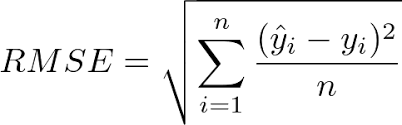

Trong đó:
* N: số điểm dữ liệu
* y(i): là phép đo thứ i
* y^i là dự đoán tương ứng của nó

In [ ]:
#Tính rmsle
def rmsle(y, y_preds):
    assert len(y) == len(y_preds)
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y_preds), 2)))

In [ ]:
from sklearn.model_selection import train_test_split

def run_model(model, matrix_list):
    #X= train[['item_condition_id','shipping','name','brand_name','c_1','c_2','ca_3']]
    #X_train, x_test, Y_train, y_test = train_test_split(X, train['price'], test_size=0.25)
    X = hstack(matrix_list).tocsr()
    X_train, x_test, Y_train, y_test = train_test_split(X, np.log1p(train['price']), test_size=0.2)
    model.fit(X_train, Y_train)
    preds = model.predict(x_test)
    del X, X_train, x_test, Y_train
    gc.collect()
    
    return preds, y_test

# **Model 1: Rigde Regression**

* Hồi quy Ridge là một kỹ thuật để phân tích dữ liệu hồi quy nhiều lần. Khi xảy ra đa cộng tuyến, các ước lượng bình phương nhỏ nhất là không chệch. Một mức độ chệch được thêm vào các ước tính hồi quy và kết quả là hồi quy sườn núi làm giảm các sai số tiêu chuẩn

* Trong hồi quy Ridge, mô hình được thiết lập với tất cả các biến đã cho. Tuy nhiên, nó không loại bỏ các biến có mối quan hệ thấp khỏi mô hình, nó đưa hệ số của các biến này về gần bằng không.

**Thuộc tính của mô hình**

* Nó có khả năng chống lại việc khai thác quá mức.
* Nó là thành kiến ​​nhưng có phương sai thấp.
* Nó tốt hơn phương pháp Least Squares khi có quá nhiều tham số.
* Nó cung cấp một giải pháp chống lại sự đa chiều. Vấn đề ở đây là số lượng biến lớn hơn số lượng quan sát. Nó cung cấp một giải pháp chống lại điều này.
* Nó có hiệu quả trong nhiều vấn đề kết nối tuyến tính. Vấn đề ở đây là có sự tương quan cao giữa các biến độc lập.
Điều quan trọng là phải tìm một giá trị tối ưu cho λ. Xác thực chéo được sử dụng cho việc này.

Hàm lỗi trong Ridge Regression:
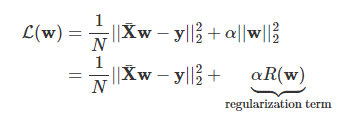

>![alt](https://i.stack.imgur.com/w0ldM.png)

In [ ]:
from sklearn.linear_model import Ridge
model = ridge = Ridge()
Ridge_preds, y_test = run_model(model, matrix_list=sparse_matrix_list)
#print(evaluate_orig_price(y_test, Ridge_preds))

In [ ]:
print("rmsle: "+str(rmsle(np.expm1(y_test), np.expm1(Ridge_preds))))

# **Model: LGBM Regression**

LightGBM là một khung tăng cường độ dốc dựa trên cây quyết định để tăng hiệu quả của mô hình và giảm mức sử dụng bộ nhớ. 
Nó sử dụng hai kỹ thuật mới: Lấy mẫu một bên dựa trên Gradient và Gói tính năng độc quyền (EFB) , đáp ứng các hạn chế của thuật toán dựa trên biểu đồ vốn được sử dụng chủ yếu trong tất cả các khung GBDT (Cây quyết định tăng cường độ dốc). Hai kỹ thuật GOSS và EFB được mô tả dưới đây hình thành các đặc điểm của Thuật toán LightGBM. Chúng kết hợp với nhau để làm cho mô hình hoạt động hiệu quả và cung cấp cho nó một lợi thế vượt trội so với các khuôn khổ GBDT khác 
* LightGBM tách cây thông theo cấp độ trái ngược với các thuật toán thúc đẩy khác phát triển theo cấp độ cây. Nó chọn lá bị rụng tối đa để phát triển. Vì lá được cố định nên thuật toán theo lá có tổn thất thấp hơn so với thuật toán theo cấp. Sự phát triển của cây khôn có lá có thể làm tăng độ phức tạp của mô hình và có thể dẫn đến việc trang bị quá nhiều trong các tập dữ liệu nhỏ.
* Dưới đây là biểu diễn sơ đồ về sự phát triển của cây có lá: 

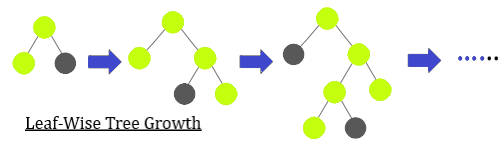

In [ ]:
from lightgbm import LGBMRegressor
lgbm_reg = LGBMRegressor()
lgbm_preds, y_test = run_model(model=lgbm_reg, matrix_list=sparse_matrix_list)

In [ ]:
print("rmsle: "+str(rmsle(np.expm1(y_test), np.expm1(lgbm_preds))))

In [ ]:
sparse_matrix_list = (train_name, train_des, train_brand_name, train_condition,
                      train_shipping, train_subcat_1, train_subcat_2, train_subcat_3)
X_train = hstack(sparse_matrix_list).tocsr()
X_train

In [ ]:
y_train = np.log1p(train['price'])
y_train

In [ ]:
Ridge_model =  Ridge()
Ridge_model.fit(X_train, y_train)

Đánh giá hai mô hình thấy mô hình Ridge tốt hơn nên chúng ta sẽ sử dụng mô hình này

# **Dự đoán giá trên tập test**

In [ ]:
sparse_matrix_list = (test_name, test_des, test_brand_name, test_condition,
                      test_shipping, test_subcat_1, test_subcat_2, test_subcat_3)
X_test = hstack(sparse_matrix_list).tocsr()

In [ ]:
preds = Ridge_model.predict(X_test)
preds

In [ ]:
preds = np.expm1(preds)
preds

# **Submission**

In [ ]:
submission = pd.read_csv('sample_submission_stg2.csv')
submission

In [ ]:
submission.loc[:, 'price'] = preds
submission

In [ ]:
submission.to_csv('submission.csv', index=False)